# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

In [7]:
import pandas as pd
%matplotlib inline

retail = pd.read_csv('../datasets/example_retail_sales.csv')
retail

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068
...,...,...
288,2016-01-01,400928
289,2016-02-01,413554
290,2016-03-01,460093
291,2016-04-01,450935


In [ ]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(retail['ds'])
df['y'] = retail['y']
df

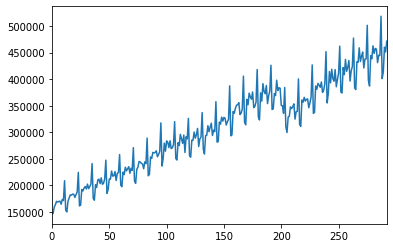

In [16]:
df['y'].plot()

In [18]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot


m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = m.make_future_dataframe(periods=6, freq='M')
future.tail()

,ds
294,2016-06-30
295,2016-07-31
296,2016-08-31
297,2016-09-30
298,2016-10-31


In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,470429.098324,460097.520363,480647.916418
295,2016-07-31,477511.078795,467227.352644,488268.350684
296,2016-08-31,454530.546471,443872.962107,464419.038460
297,2016-09-30,462896.353299,451969.622824,473050.732147
298,2016-10-31,468521.678045,458197.684705,478252.622147
